In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/home/vatsal/Downloads/winequality-red.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.keys().drop('quality')

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

/home/vatsal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


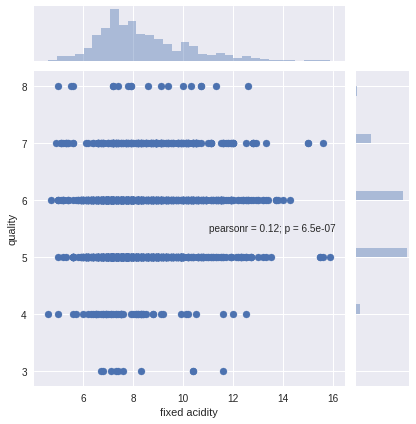

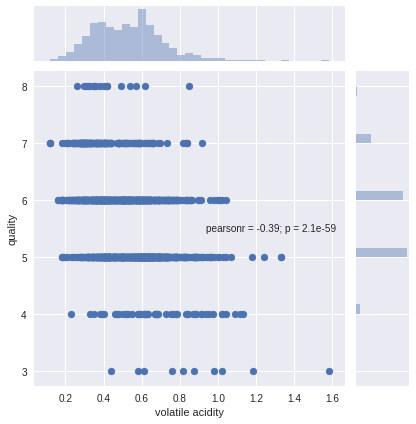

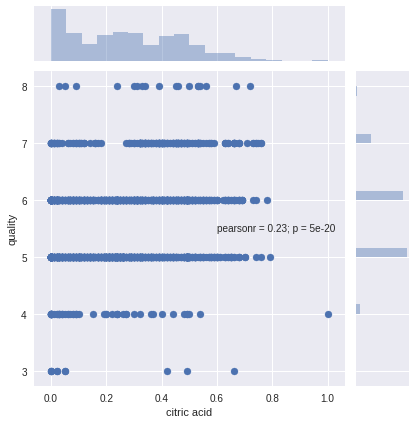

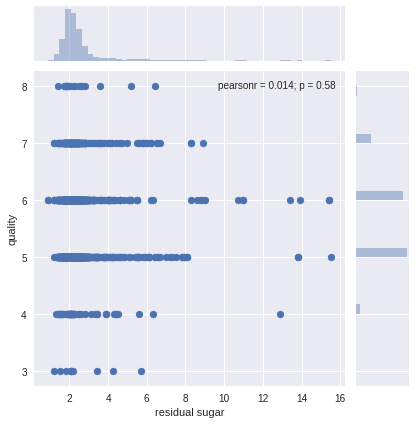

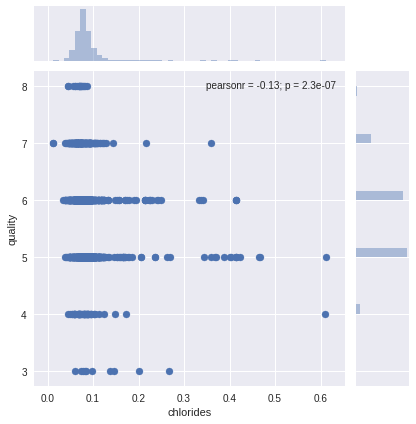

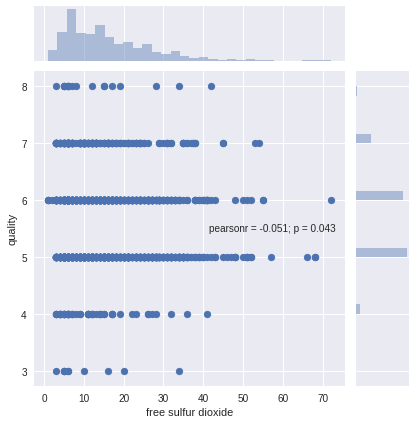

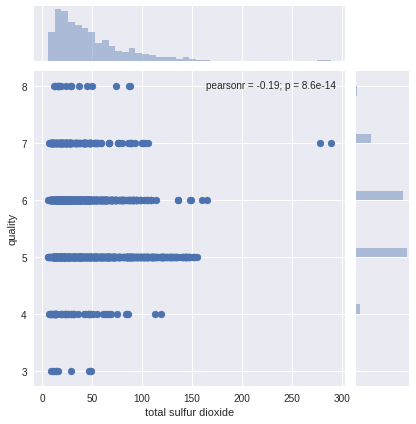

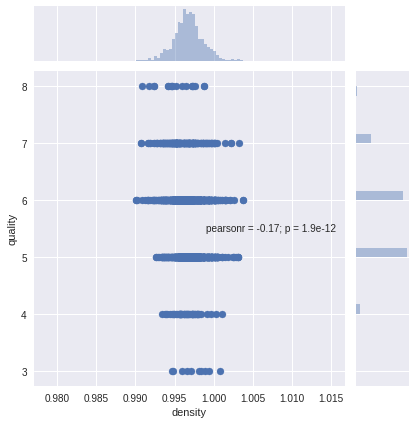

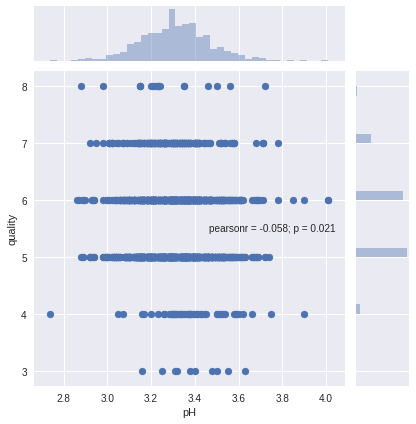

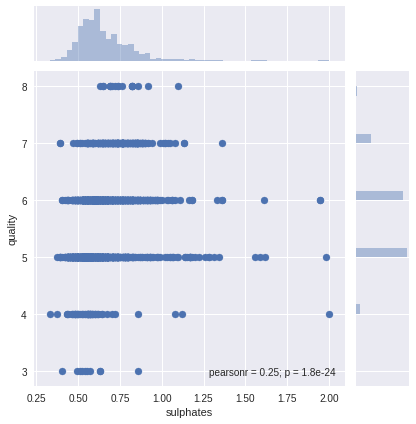

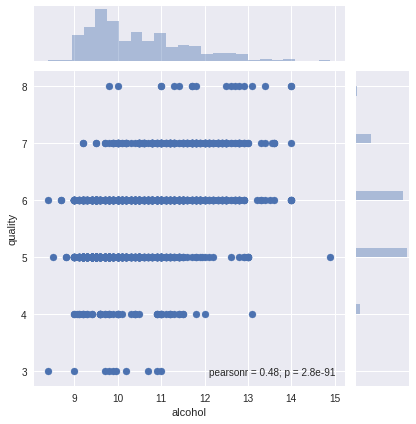

In [9]:
for i in data.keys().drop('quality'):
    sns.jointplot(x=i,y='quality',data=data)

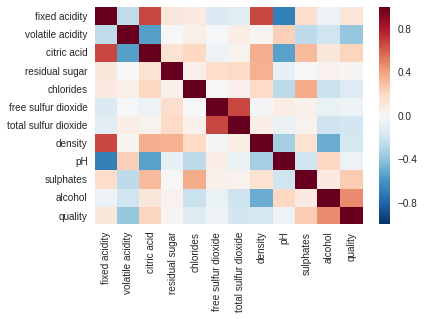

In [23]:
sns.heatmap(data.corr())

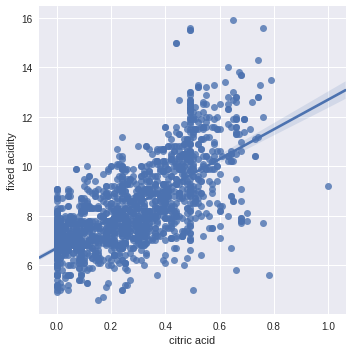

In [25]:
sns.lmplot('citric acid','fixed acidity',data)

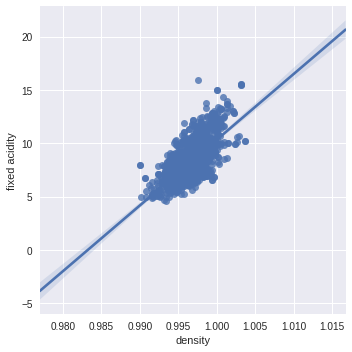

In [26]:
sns.lmplot('density','fixed acidity',data)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()

In [75]:
scaled_data = ss.fit_transform(data)

In [76]:
scaled_data = pd.DataFrame(scaled_data,columns=data.keys())

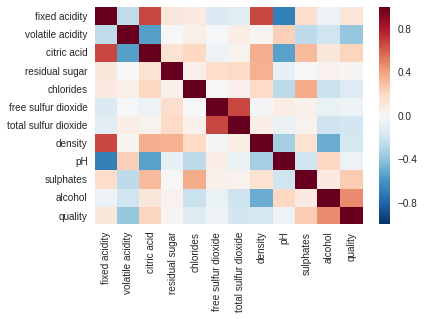

In [77]:
sns.heatmap(scaled_data.corr())

In [78]:
scaled_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA()

In [81]:
pca_data = pca.fit_transform(scaled_data)

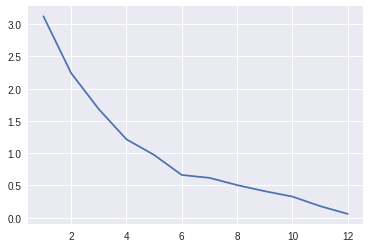

In [83]:
plt.plot(range(1,13),pca.explained_variance_)

In [36]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data.drop('quality',axis=1),data['quality'],test_size=0.3)

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
mylr = LogisticRegression()

In [87]:
mylr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
yp = mylr.predict(x_test)

In [89]:
from sklearn import metrics

In [90]:
    print(metrics.classification_report(y_test,yp))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00        14
          5       0.68      0.78      0.72       208
          6       0.53      0.62      0.57       190
          7       0.44      0.12      0.19        58
          8       0.00      0.00      0.00         7

avg / total       0.55      0.60      0.56       480



/home/vatsal/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
myrfc = RandomForestClassifier()

In [93]:
from sklearn.grid_search import GridSearchCV

In [94]:
grid_params = {'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

In [95]:
grid = GridSearchCV(myrfc,grid_params,verbose=3,refit=True)

In [96]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=1 .....................................................
[CV] ............................ max_depth=1, score=0.509333 -   0.0s
[CV] max_depth=1 .....................................................
[CV] ............................ max_depth=1, score=0.560322 -   0.0s
[CV] max_depth=1 .....................................................
[CV] ............................ max_depth=1, score=0.566038 -   0.0s
[CV] max_depth=2 .....................................................
[CV] ............................ max_depth=2, score=0.552000 -   0.0s
[CV] max_depth=2 .....................................................
[CV] ............................ max_depth=2, score=0.597855 -   0.0s
[CV] max_depth=2 .....................................................
[CV] ............................ max_depth=2, score=0.603774 -   0.0s
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............................ max_depth=3, score=0.541333 -   0.0s
[CV] max_depth=3 .....................................................
[CV] ............................ max_depth=3, score=0.592493 -   0.0s
[CV] max_depth=3 .....................................................
[CV] ............................ max_depth=3, score=0.574124 -   0.0s
[CV] max_depth=4 .....................................................
[CV] ............................ max_depth=4, score=0.562667 -   0.0s
[CV] max_depth=4 .....................................................
[CV] ............................ max_depth=4, score=0.603217 -   0.0s
[CV] max_depth=4 .....................................................
[CV] ............................ max_depth=4, score=0.601078 -   0.0s
[CV] max_depth=5 .....................................................
[CV] ............................ max_depth=5, score=0.568000 -   0.0s
[CV] max_depth=5 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [97]:
yp = grid.predict(x_test)

In [98]:
metrics.accuracy_score(y_test,yp)

0.66249999999999998

In [99]:
myrfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
yp = myrfc.predict(x_test)

In [101]:
metrics.accuracy_score(y_test,yp)

0.6958333333333333